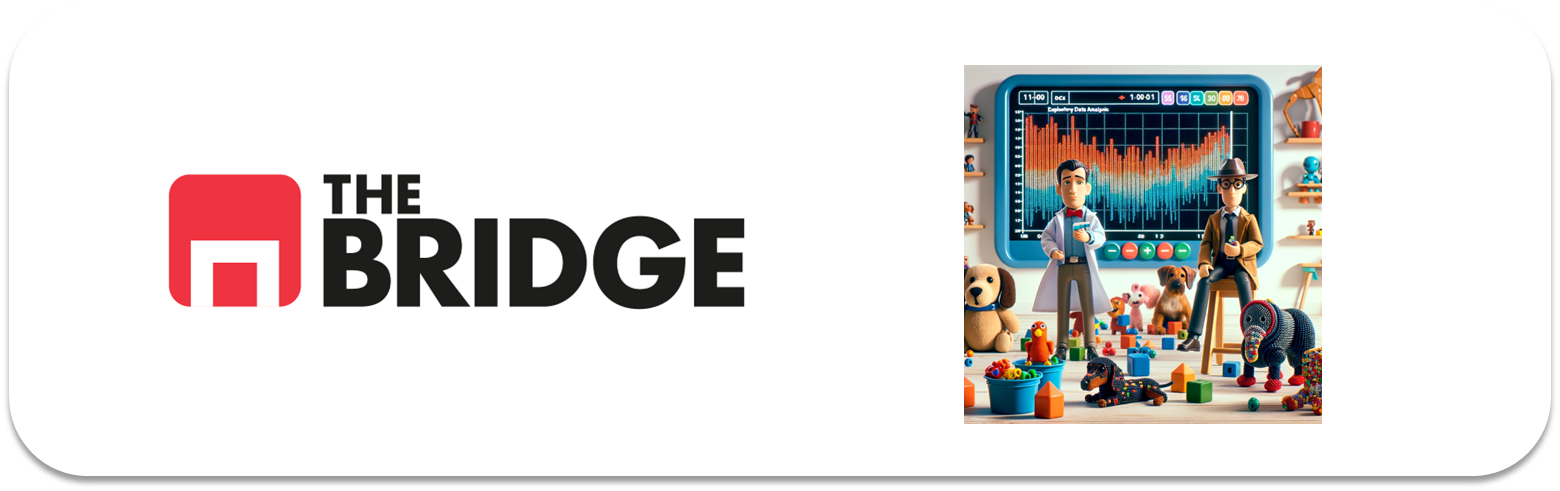

## Análisis de Datos (Bivariante): Numéricas. Correlaciones

En esta sesión vamos a analizar las variables numéricas de nuestros datasets y para ello vamos a utilizar dos herramientas el diagrama de dispersión y la correlación matemática. Pero ojo, eso es así por la naturaleza de nuestros datos, pero si nuestro dataset fuera por ejemplo de diferentes cotizaciones de empresas en los últimos 365 días entonces añadiríamos a lo anterior (de hecho lo haríamos lo primero) un gráfico de evolución temporal de las mismas en el que ambas estuvieran presentes. [Recuerda que no contemplamos el análisis de series temporales en el workout pero haremos algùn ejercicio ilustrativo]

Pues empecemos y para ello ya sabes preparar nuestro material (los datasets) e instrumental (liberías y funciones):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, grafico_dispersion_con_correlacion # Este módulo lo tienes en el directorio de los notebooks, puede abrirlo y jugar con las funciones que contiene

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Caso 1. Seguros: Bivariante CLV-Ingresos

En línea con investigar la relación entre `response` y `CLV` tenemos el análisis entre `CLV` e `ingresos`. Como en las otras veces:

**#1**  Tener la referencia de la **distribución de valores por separado de cada variable**

(2,)


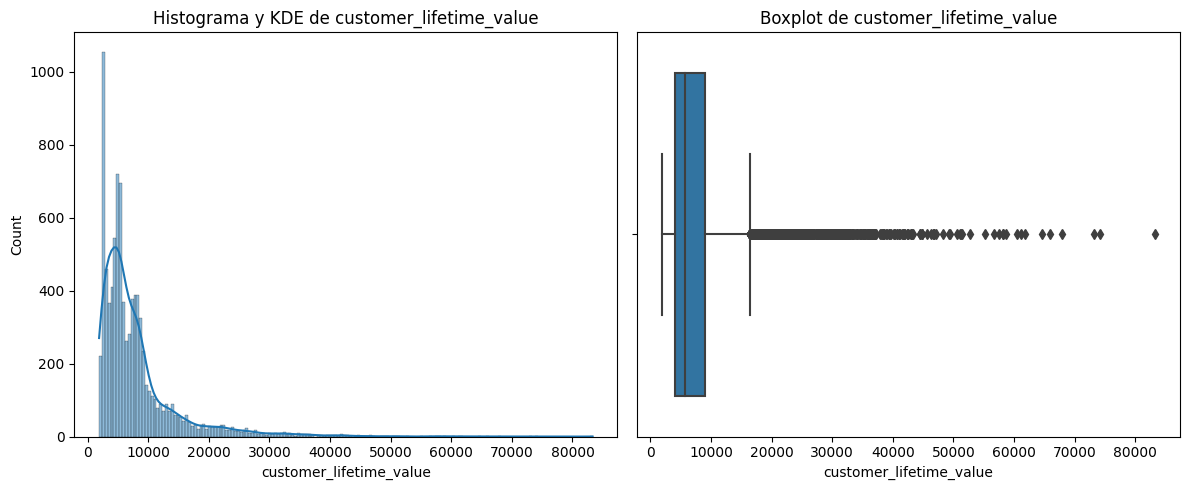

In [2]:
plot_combined_graphs(df_seguros,["customer_lifetime_value"])

(2,)


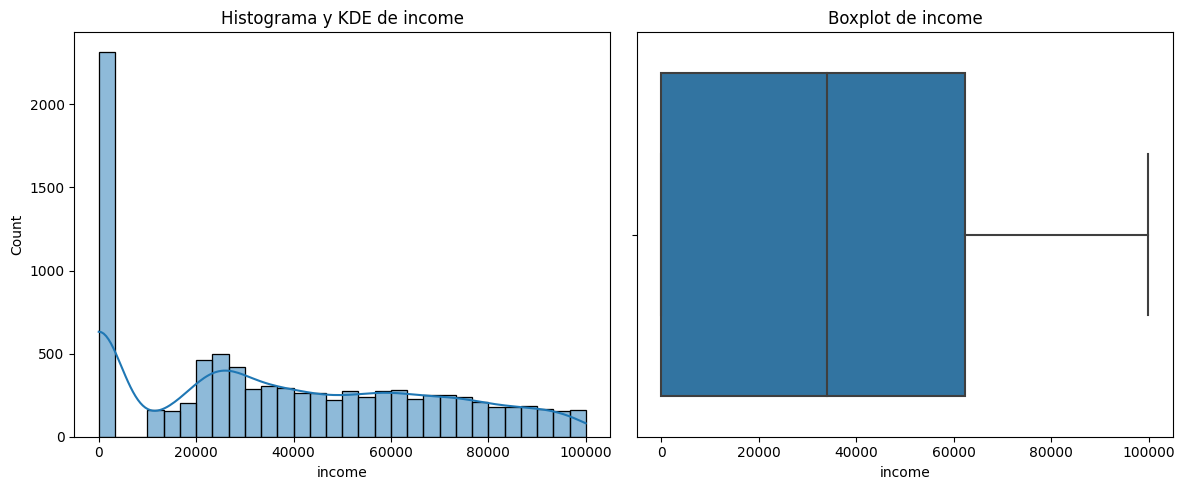

In [5]:
plot_combined_graphs(df_seguros,["income"], bins=30)# con ese numero se cambia el tamaño de la barras de los bins

**#2** Como ambas variables están medidas en la misma unidad mostramos **una comparación numérica de sus `describe`**:

In [6]:
df_seguros[["customer_lifetime_value","income"]].describe()

,customer_lifetime_value,income
count,9134.000000,9134.000000
mean,8004.940475,37657.380009
std,6870.967608,30379.904734
min,1898.007675,0.000000
25%,3994.251794,0.000000
50%,5780.182197,33889.500000
75%,8962.167041,62320.000000
max,83325.381190,99981.000000


**#3** Y ahora comparamos los datos unos con otros. **Utilizamos un diagrama de dispersión *scattered plot***

Un scatter plot, o diagrama de dispersión, es un tipo de gráfico en el que cada punto representa un observación individual(cliente), es decir cada punto nos pondra los valores de estas variables para un cliente,  con la posición en el eje horizontal (X) indicando el valor de una variable y la posición en el eje vertical (Y) indicando el valor de la otra variable.



Los scatter plots son útiles para observar la relación entre dos variables numéricas. Se utilizan para detectar correlaciones, tendencias, agrupaciones, o para identificar patrones inusuales o valores atípicos (outliers) en los datos. 

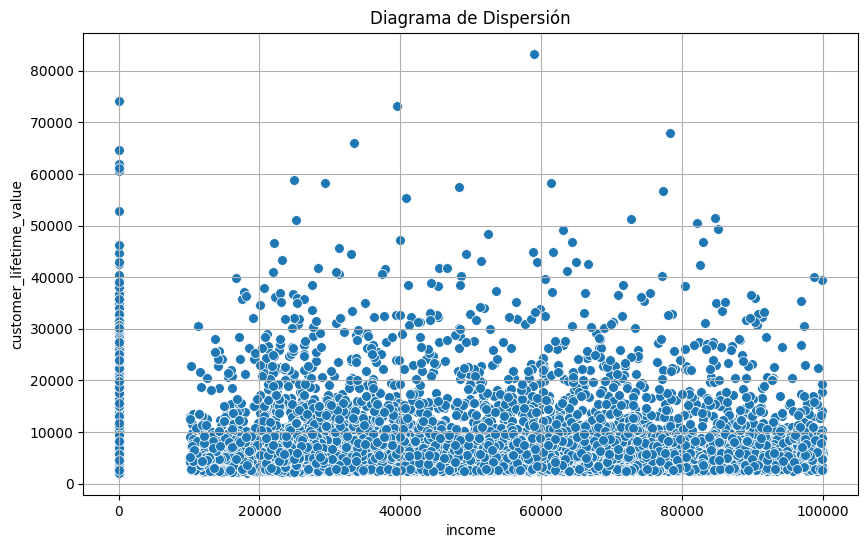

In [14]:
grafico_dispersion_con_correlacion(df_seguros,"income","customer_lifetime_value", 50)

Y bien, ¿qué opinas? 

### Correlación y relación entre variables numéricas


La [correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) trata de establecer la relación o **dependencia que existe entre las dos variables**. Es decir, determinar si los cambios en una de las variables influyen en los cambios de la otra. En caso de que suceda, diremos que las variables están correlacionadas o que hay correlación entre ellas. La correlación es **positiva** cuando los valores de las variables aumenta juntos; y es **negativa** cuando un valor de una variable se reduce cuando el valor de la otra variable aumenta.

De primeras se suele analizar usando un diagrama de dispersión como el mostrado y los ejemplos prototípicos son:

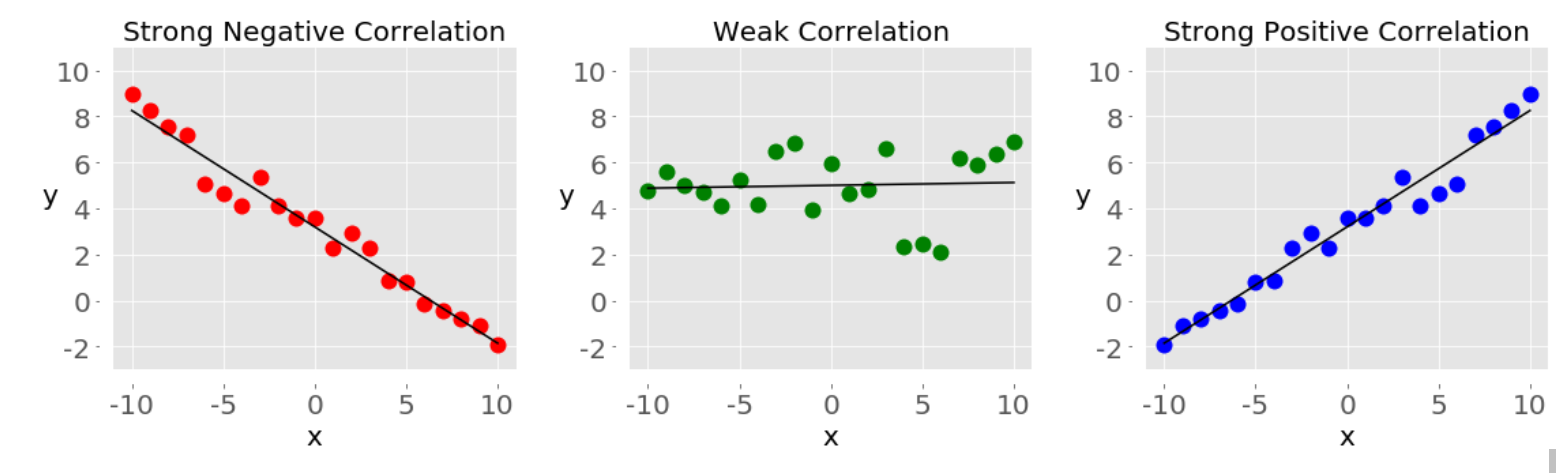

[En el primero se ve que al aumentar la variable x disminuye la y, se dice que hay una fuerte correlación negativa, en el segundo los cambios en x, no parecen afectar a los cambios en y, se dice que no hay correlación o que esta es muy débil, y finalmente cuando los cambios de x se relacionan con cambios de y en el mismo sentido se habla de una correlación fuerte]

¿A cuál de los tres se te parece el gráfico de dispersión de ingresos y CLV? A los dos de los extremos no, eso seguro. Por eso podemos pensar que no hay correlación entre ambos, es decir el CLV varía de forma similar y en rangos similares independientemente del income del cliente. 

Pero no acaba aquí la cosa hay un coeficiente matemático (de hecho hay varios) que miden esa relación. El más utilizado, y el que vamos a usar nosotros es el **coeficiente o correlación de Pearson**. Cuya fórmula te dejo aquí (no te asustes que usaremos funciones y métodos para obtenerlo):

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$


En esta fórmula:

- $r$ es el coeficiente de correlación de Pearson.
- $x_i$ y $y_i$ son los valores individuales de las dos variables.
- $\bar{x}$ y $\bar{y}$ son las medias de las variables `x` y `y`, respectivamente.
- $n$ es el número de observaciones (parejas de valores).

El coeficiente $r$ varía entre -1 y 1, donde_
* 1 significa una correlación positiva perfecta 
* -1 una correlación negativa perfecta
* 0 indica que no hay correlación **lineal** entre las variables. [marco lineal en negrita porque puede haber otro tipo de relación]

Y yendo a lo práctico, tenemos varias formas de obtener ese coeficiente:

In [15]:
df_seguros[["income","customer_lifetime_value"]].corr()

,income,customer_lifetime_value
income,1.000000,0.024366
customer_lifetime_value,0.024366,1.000000


In [17]:
from scipy.stats import pearsonr

pearsonr(df_seguros["income"], df_seguros["customer_lifetime_value"])

PearsonRResult(statistic=0.024365660747409135, pvalue=0.019874910954666508)

De ese pvalue hablaremos en breve.

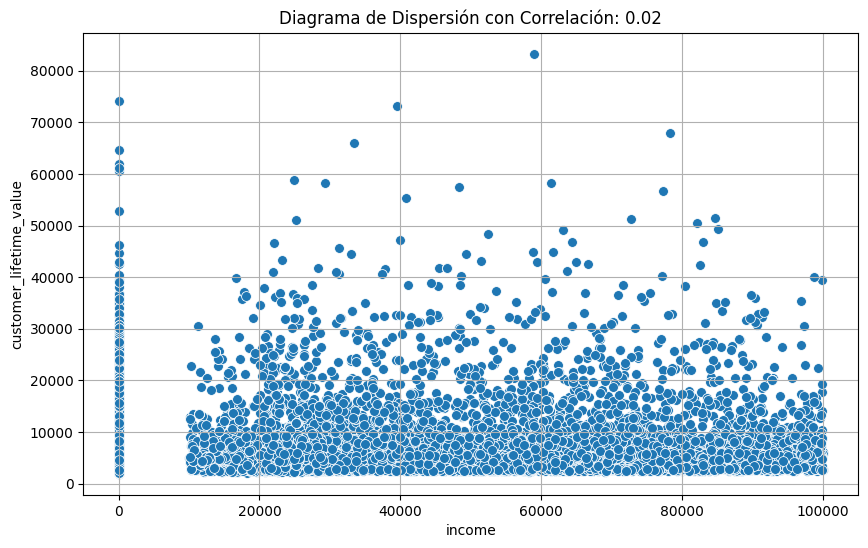

In [19]:
grafico_dispersion_con_correlacion(df_seguros,"income","customer_lifetime_value", 50, mostrar_correlacion = True)# el cero de income son outliers

Básicamente: No están correladas linealmente, lo cual ya nos lo podemos apuntar como un elemento más de nuestro análisis. 

Pero no termina aquí el análisis, ahora está claro que es necesario hacer el análisis en dos. Fijate en el salto entre 0 y el siguiente valor. **El 0 es un outlier de Income** que no habíamos visto antes. Así que hay que quitarlo y quizás analizar por separado y preguntar que tipo de cliente es este (seguros contratados por otros?) y también así dejar limpiar la varible income para analizarla con el resto.

(2,)


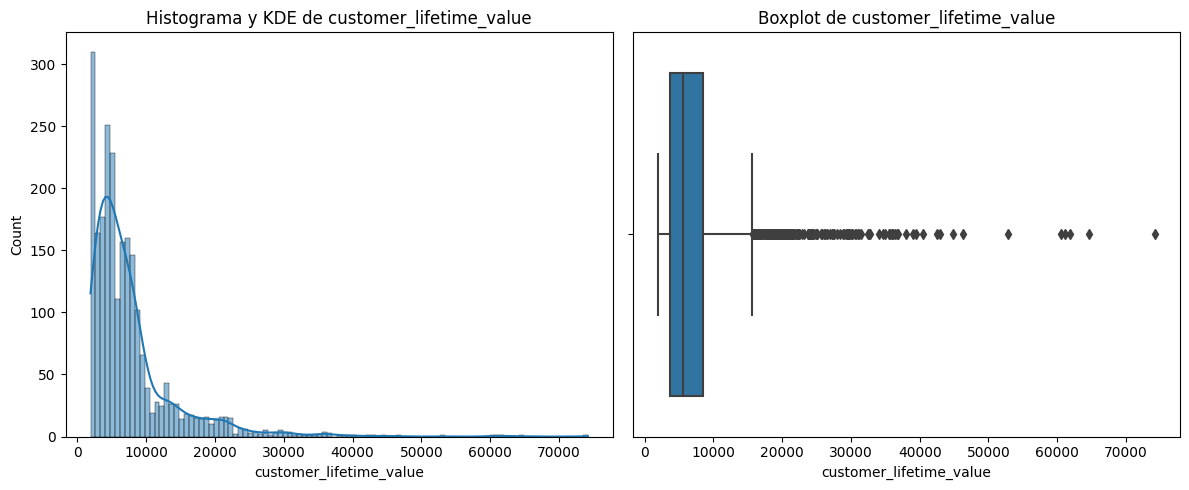

In [20]:
plot_combined_graphs(df_seguros.loc[df_seguros.income == 0], ["customer_lifetime_value"])

(2,)


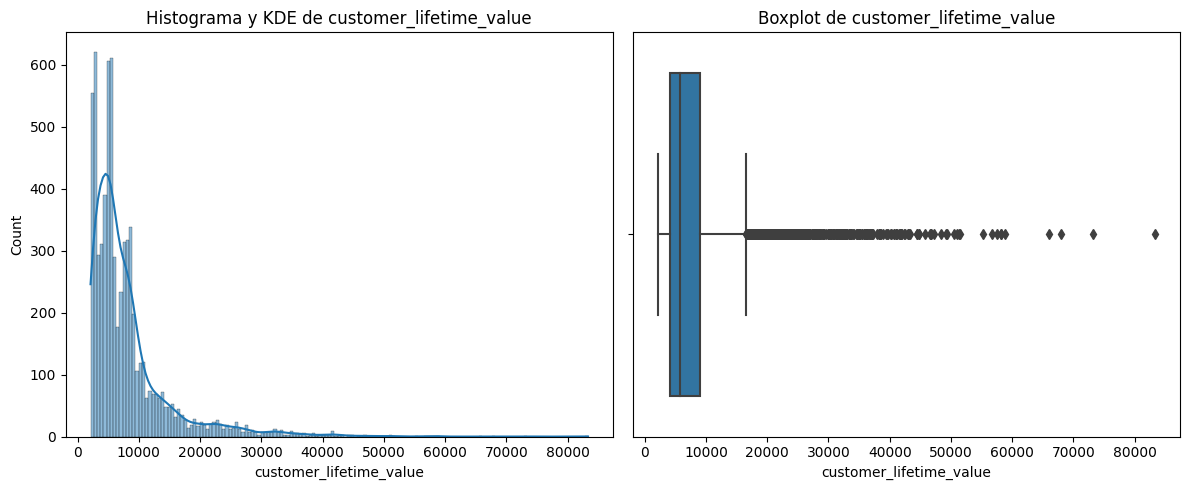

In [21]:
plot_combined_graphs(df_seguros.loc[df_seguros.income > 0], ["customer_lifetime_value"])

Tiene pinta de que income = 0 es una forma de marcar "No sabemos el income" del cliente. Esto es otro dato a preguntar, y claramente ahora tendría que hacer los dos análisis por separado.

### Contraste de hipótesis y el p-value (una intro muy grosera a modo de adelanto)

Ahora y en las sesiones siguientes vamos a hacer uso de una técnica estadística denominada contraste de hipótesis que es básicamente una "prueba del algodón" matemática para dar "credibilidad matemática" a afirmaciones como "la variable x e y están correledas". Por ejemplo, en el caso en el que dos variables muestren un coeficiente de 0.02 de Pearson, ¿cuánto podemos asegurar de que esto implica que son independientes (linealmente)? Bueno ojo en el caso que estamos viendo son los valores que hay (recuerda que es la población total) pero nosotros hacemos una extensión estadística [eh, JAime, ein, qué, nada no le des importancia, a esto último y vamos a lo que vamos. 

La contestación a esa pregunta nos la da "el contraste de hipótesis" (que veremos con un poco más de rigor cuando entremos en el mundo de la estadística inferencial en el módulo siguiente). Para algunas medidas tendremos un test (esa prueba del algodón) con nombres tan sugerentes como t de student, chi cuadrado, test de Wilcoxon, test de Shapiro-Wilk o prueba F de Fisher.


En esos test planteamos nuestra hipótesis y haciendo los pasos del test (buscando y cruzando en tablas, rezando a la luna, etc,etc no en serio son test de cuando todo se hacía con tablas y a mano) este test te va a dar un valor denominado p-value que es básicamente la probabilidad de que la hipótesis contraria a la tuya sea lo normal. Es decir cuanto más bajo ese p más "seguro" podrías estar de que tu suposición es correcta.

Resumiendo:
* En esta píldora y en las siguientes vamos a ver una serie de test (y como se hacen con Python) que nos darán ese valor p o probabilidad de sorpresa, y si ese valor p está por debajo de un umbral (típicamente 0.05) entonces pensaremos que nuestra suposición (que dos variables tienen relación) puede ser cierta con bastante confianza. En terminos formales nos dirá que la relación o falta de ella es `estadísticamente significativa`



Ahora olvida lo dicho y cuando obtengas el diagrama de dispersión entre dos variables numéricas, también obtén su coeficiente de correlación usando el la función `pearsonr` tal como has visto, si el valor p que obtienes es menor de 0.05 puedes pensar que el resultado obtenido es estadísticamente significativo (vamos que te puedes fiar del coeficiente salido y de sus consecuencias, cercano a 1 o -1 es que hay correlación lineal, y cercano o entorno a cero es que son independientes linealmente)